In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
from datetime import datetime

In [ ]:
# Specify root directory with example CSVs
ROOT = '/content/drive/My Drive/examples/'

In [2]:
def read_ee_ccdc (root, sample, spectral):
  # Read CCDC CSV into pandas dataframe
  ccdc = pd.read_csv('{root}{sample}_ccdc_{spectral}.csv'.format(sample=sample, root=root, spectral=spectral))

  # Convert date values to datetime format
  ccdc['Date'] = pd.to_datetime(ccdc['Date'])
  return ccdc

In [3]:
def read_ee_lt (root, sample, spectral):
  # Read LT CSV into pandas dataframe
  lt = pd.read_csv('{root}{sample}_lt_{spectral}.csv'.format(sample=sample, root=root, spectral=spectral))

  # Convert date values to datetime format
  lt['Year'] = lt['Year'].str.replace(',','') + '-07-20'
  lt['Year'] = pd.to_datetime(lt.Year, format='%Y-%m-%d')

  if spectral== 'tcw':
    lt['Original'] = lt['Original'].str.replace(',','').astype(float)/10000
    lt['Fitted'] = lt['Fitted'].str.replace(',','').astype(float)/10000
  else :
    lt['Original'] = lt['Original']/1000
    lt['Fitted'] = lt['Fitted']/1000

  return lt


In [4]:
col_l = '#154360' # CCDC
col_2 = '#154360' # LandTrendr

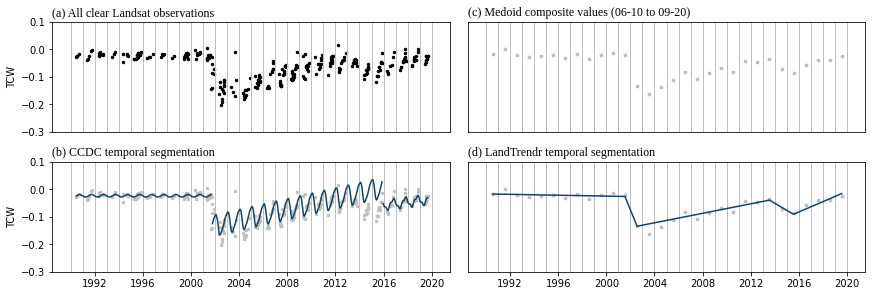

In [5]:
# FIGURE 1: Compare inputs and segmentation results for single index
SAMPLE = 'ME'

SPECTRAL = 'tcw'
YLIM_MAX = 0.1
YLIM_MIN = -0.3

ccdc = read_ee_ccdc(ROOT, SAMPLE, SPECTRAL)
lt = read_ee_lt(ROOT, SAMPLE, SPECTRAL)

fig, ax = plt.subplots(2,2, constrained_layout=True)
fig.set_size_inches(12, 4)

years = list(range(1990, 2021))
for i, year in enumerate(years):
  year = datetime.strptime('{year}-01-01'.format(year=year), '%Y-%m-%d')
  ax[0][0].axvline(year, color='0.75', linewidth=1) 
  ax[1][0].axvline(year, color='0.75', linewidth=1) 
  ax[0][1].axvline(year, color='0.75', linewidth=1) 
  ax[1][1].axvline(year, color='0.75', linewidth=1) 

ax[0][0].scatter(ccdc['Date'], ccdc['Observation'], c='k', s=6, marker='o')
ax[0][0].set_ylim(YLIM_MIN,YLIM_MAX)
ax[0][0].set_ylabel(SPECTRAL.upper())
ax[0][0].axes.get_xaxis().set_ticks([])
ax[0][0].set_title('(a) All clear Landsat observations', loc='left', fontname='Liberation Serif')

ax[1][0].plot(ccdc['Date'], ccdc['fit 1'], c=col_l)
ax[1][0].plot(ccdc['Date'], ccdc['fit 2'], c=col_l)
ax[1][0].plot(ccdc['Date'], ccdc['fit 3'], c=col_l)
ax[1][0].plot(ccdc['Date'], ccdc['fit 4'], c=col_l)
ax[1][0].scatter(ccdc['Date'], ccdc['Observation'], c='0.75', s=6, marker='o')
ax[1][0].set_ylim(YLIM_MIN,YLIM_MAX)
ax[1][0].set_ylabel(SPECTRAL.upper())
ax[1][0].set_title('(b) CCDC temporal segmentation', loc='left', fontname='Liberation Serif')

ax[0][1].scatter(lt['Year'], lt['Original'], c='0.75', s=8, marker='o')
ax[0][1].set_ylim(YLIM_MIN,YLIM_MAX)
ax[0][1].axes.get_xaxis().set_ticks([])
ax[0][1].axes.get_yaxis().set_ticks([])
ax[0][1].set_title('(c) Medoid composite values (06-10 to 09-20)', loc='left', fontname='Liberation Serif')

ax[1][1].plot(lt['Year'], lt['Fitted'], c=col_2)
ax[1][1].scatter(lt['Year'], lt['Original'], c='0.75', s=8, marker='o')
ax[1][1].set_ylim(YLIM_MIN,YLIM_MAX)
ax[1][1].axes.get_yaxis().set_ticks([])
ax[1][1].set_title('(d) LandTrendr temporal segmentation', loc='left', fontname='Liberation Serif')

fig.patch.set_facecolor('white')
plt.show()

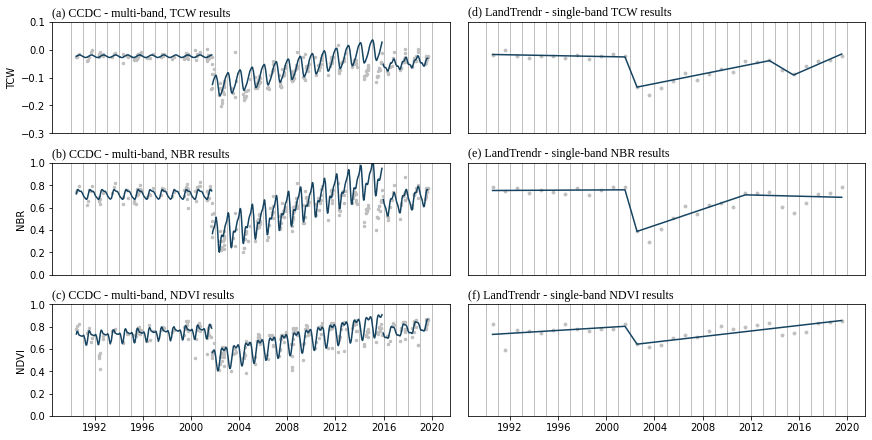

In [6]:
# FIGURE 2: Compare segmentation results for different indices
ccdc_nbr = read_ee_ccdc(ROOT, SAMPLE, 'nbr')
ccdc_ndvi = read_ee_ccdc(ROOT, SAMPLE, 'ndvi')
ccdc_tcw = read_ee_ccdc(ROOT, SAMPLE, 'tcw')

lt_nbr = read_ee_lt(ROOT, SAMPLE, 'nbr')
lt_ndvi = read_ee_lt(ROOT, SAMPLE, 'ndvi')
lt_tcw = read_ee_lt(ROOT, SAMPLE, 'tcw')

fig, ax = plt.subplots(3,2, constrained_layout=True)
fig.set_size_inches(12, 6)

years = list(range(1990, 2021))
for i, year in enumerate(years):
  year = datetime.strptime('{year}-01-01'.format(year=year), '%Y-%m-%d')
  ax[0][0].axvline(year, color='0.75', linewidth=1) 
  ax[1][0].axvline(year, color='0.75', linewidth=1) 
  ax[2][0].axvline(year, color='0.75', linewidth=1) 
  ax[0][1].axvline(year, color='0.75', linewidth=1) 
  ax[1][1].axvline(year, color='0.75', linewidth=1) 
  ax[2][1].axvline(year, color='0.75', linewidth=1) 


ax[0][0].plot(ccdc_tcw['Date'], ccdc_tcw['fit 1'], c=col_l)
ax[0][0].plot(ccdc_tcw['Date'], ccdc_tcw['fit 2'], c=col_l)
ax[0][0].plot(ccdc_tcw['Date'], ccdc_tcw['fit 3'], c=col_l)
ax[0][0].plot(ccdc_tcw['Date'], ccdc_tcw['fit 4'], c=col_l)
ax[0][0].scatter(ccdc_tcw['Date'], ccdc_tcw['Observation'], c='0.75', s=6, marker='o')
ax[0][0].set_ylim(-0.3, 0.1)
ax[0][0].set_ylabel('tcw'.upper())
ax[0][0].axes.get_xaxis().set_ticks([])
ax[0][0].set_title('(a) CCDC - multi-band, TCW results', loc='left', fontname='Liberation Serif')

ax[0][1].plot(lt_tcw['Year'], lt_tcw['Fitted'], c=col_2)
ax[0][1].scatter(lt_tcw['Year'], lt_tcw['Original'], c='0.75', s=8, marker='o')
ax[0][1].set_ylim(-0.3, 0.1)
ax[0][1].axes.get_xaxis().set_ticks([])
ax[0][1].axes.get_yaxis().set_ticks([])
ax[0][1].set_title('(d) LandTrendr - single-band TCW results', loc='left', fontname='Liberation Serif')

ax[1][0].plot(ccdc_nbr['Date'], ccdc_nbr['fit 1'], c=col_l)
ax[1][0].plot(ccdc_nbr['Date'], ccdc_nbr['fit 2'], c=col_l)
ax[1][0].plot(ccdc_nbr['Date'], ccdc_nbr['fit 3'], c=col_l)
ax[1][0].plot(ccdc_nbr['Date'], ccdc_nbr['fit 4'], c=col_l)
ax[1][0].scatter(ccdc_nbr['Date'], ccdc_nbr['Observation'], c='0.75', s=6, marker='o')
ax[1][0].set_ylim(0,1)
ax[1][0].set_ylabel('nbr'.upper())
ax[1][0].axes.get_xaxis().set_ticks([])
ax[1][0].set_title('(b) CCDC - multi-band, NBR results', loc='left', fontname='Liberation Serif')

ax[1][1].plot(lt_nbr['Year'], lt_nbr['Fitted'], c=col_2)
ax[1][1].scatter(lt_nbr['Year'], lt_nbr['Original'], c='0.75', s=8, marker='o')
ax[1][1].set_ylim(0,1)
ax[1][1].axes.get_xaxis().set_ticks([])
ax[1][1].axes.get_yaxis().set_ticks([])
ax[1][1].set_title('(e) LandTrendr - single-band NBR results', loc='left', fontname='Liberation Serif')

ax[2][0].plot(ccdc_ndvi['Date'], ccdc_ndvi['fit 1'], c=col_l)
ax[2][0].plot(ccdc_ndvi['Date'], ccdc_ndvi['fit 2'], c=col_l)
ax[2][0].plot(ccdc_ndvi['Date'], ccdc_ndvi['fit 3'], c=col_l)
ax[2][0].plot(ccdc_ndvi['Date'], ccdc_ndvi['fit 4'], c=col_l)
ax[2][0].scatter(ccdc_ndvi['Date'], ccdc_ndvi['Observation'], c='0.75', s=6, marker='o')
ax[2][0].set_ylim(0,1)
ax[2][0].set_ylabel('ndvi'.upper())
ax[2][0].set_title('(c) CCDC - multi-band, NDVI results', loc='left', fontname='Liberation Serif')

ax[2][1].plot(lt_ndvi['Year'], lt_ndvi['Fitted'], c=col_2)
ax[2][1].scatter(lt_ndvi['Year'], lt_ndvi['Original'], c='0.75', s=8, marker='o')
ax[2][1].set_ylim(0,1)
ax[2][1].axes.get_yaxis().set_ticks([])
ax[2][1].set_title('(f) LandTrendr - single-band NDVI results', loc='left', fontname='Liberation Serif')


fig.patch.set_facecolor('white')
plt.show()



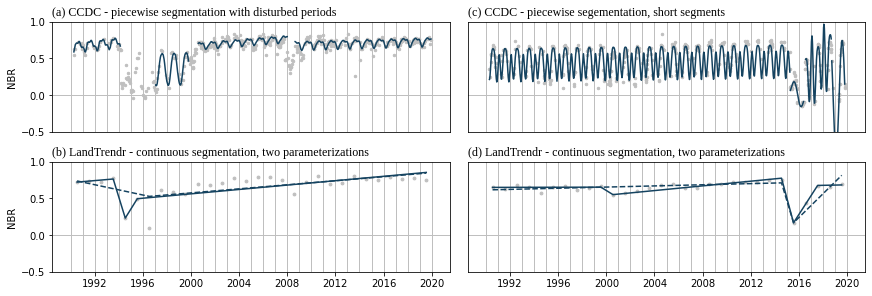

In [7]:
# FIGURE 3: Compare functional forms
SAMPLE_1 = 'SC'
SAMPLE_2 = 'MN'

SPECTRAL = 'nbr'
SPECTRAL_mod = 'nbr_recoverythresh50'

YLIM_MAX = 1.0
YLIM_MIN = -0.5

ccdc_1 = read_ee_ccdc(ROOT, SAMPLE_1, SPECTRAL)
lt_1 = read_ee_lt(ROOT, SAMPLE_1, SPECTRAL)
lt_1b = read_ee_lt(ROOT, SAMPLE_1, SPECTRAL_mod)

ccdc_2 = read_ee_ccdc(ROOT, SAMPLE_2, SPECTRAL)
lt_2 = read_ee_lt(ROOT, SAMPLE_2, SPECTRAL)
lt_2b = read_ee_lt(ROOT, SAMPLE_2, SPECTRAL_mod)

fig, ax = plt.subplots(2,2, constrained_layout=True)
fig.set_size_inches(12, 4)

years = list(range(1990, 2021))
for i, year in enumerate(years):
  year = datetime.strptime('{year}-01-01'.format(year=year), '%Y-%m-%d')
  ax[0][0].axvline(year, color='0.75', linewidth=1) 
  ax[0][1].axvline(year, color='0.75', linewidth=1) 
  ax[1][0].axvline(year, color='0.75', linewidth=1) 
  ax[1][1].axvline(year, color='0.75', linewidth=1) 

ax[0][0].axhline(0, color='0.75', linewidth=1) 
ax[0][1].axhline(0, color='0.75', linewidth=1) 
ax[1][0].axhline(0, color='0.75', linewidth=1) 
ax[1][1].axhline(0, color='0.75', linewidth=1) 

ax[0][0].plot(ccdc_1['Date'], ccdc_1['fit 1'], c=col_l)
ax[0][0].plot(ccdc_1['Date'], ccdc_1['fit 2'], c=col_l)
ax[0][0].plot(ccdc_1['Date'], ccdc_1['fit 3'], c=col_l)
ax[0][0].plot(ccdc_1['Date'], ccdc_1['fit 4'], c=col_l)
ax[0][0].scatter(ccdc_1['Date'], ccdc_1['Observation'], c='0.75', s=6, marker='o')
ax[0][0].set_ylim(YLIM_MIN,YLIM_MAX)
ax[0][0].set_ylabel(SPECTRAL.upper())
ax[0][0].axes.get_xaxis().set_ticks([])
ax[0][0].set_title('(a) CCDC - piecewise segmentation with disturbed periods', loc='left', fontname='Liberation Serif')

ax[1][0].plot(lt_1['Year'], lt_1['Fitted'], c=col_2, ls='--')
ax[1][0].plot(lt_1b['Year'], lt_1b['Fitted'], c=col_2)
ax[1][0].scatter(lt_1['Year'], lt_1['Original'], c='0.75', s=8, marker='o')
ax[1][0].set_ylim(YLIM_MIN,YLIM_MAX)
ax[1][0].set_ylabel(SPECTRAL.upper())
ax[1][0].set_title('(b) LandTrendr - continuous segmentation, two parameterizations', loc='left', fontname='Liberation Serif')

ax[0][1].plot(ccdc_2['Date'], ccdc_2['fit 1'], c=col_l)
ax[0][1].plot(ccdc_2['Date'], ccdc_2['fit 2'], c=col_l)
ax[0][1].plot(ccdc_2['Date'], ccdc_2['fit 3'], c=col_l)
ax[0][1].plot(ccdc_2['Date'], ccdc_2['fit 4'], c=col_l)
ax[0][1].scatter(ccdc_2['Date'], ccdc_2['Observation'], c='0.75', s=6, marker='o')
ax[0][1].set_ylim(YLIM_MIN,YLIM_MAX)
ax[0][1].axes.get_yaxis().set_ticks([])
ax[0][1].axes.get_xaxis().set_ticks([])
ax[0][1].set_title('(c) CCDC - piecewise segementation, short segments', loc='left', fontname='Liberation Serif')

ax[1][1].plot(lt_2['Year'], lt_2['Fitted'], c=col_2, ls='--')
ax[1][1].plot(lt_2b['Year'], lt_2b['Fitted'], c=col_2)
ax[1][1].scatter(lt_2['Year'], lt_2['Original'], c='0.75', s=8, marker='o')
ax[1][1].set_ylim(YLIM_MIN,YLIM_MAX)
ax[1][1].axes.get_yaxis().set_ticks([])
ax[1][1].set_title('(d) LandTrendr - continuous segmentation, two parameterizations', loc='left', fontname='Liberation Serif')

fig.patch.set_facecolor('white')
plt.show()